In [1]:
## Importing Libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading Dataset

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Data Preprocessing

In [5]:
# Reshape the data

X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [6]:
# Normalize the pixel value in between 0 to 1

X_train = X_train/255
X_test = X_test/255

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# One-Hot Encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Build the Neural Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Forward Propagation

In [11]:
model = Sequential()

# Adding the input layer
model.add(Dense(32, input_dim = 28*28))

# Adding the first hidden layer
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

# Adding the second hidden layer
model.add(Dense(64, activation = 'relu', kernel_initializer='he_normal'))

# Adding the Output layer
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 38,250
Trainable params: 38,250
Non-trainable params: 0
_________________________________________________________________


## Compile The Model (BackPropagation)

In [13]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

## Train the Model

In [14]:
history = model.fit(X_train, y_train, batch_size=100, epochs = 20, validation_split=0.2)

Epoch 1/20
480/480 [==============================] - 4s 6ms/step - loss: 0.5421 - accuracy: 0.8288 - val_loss: 0.2250 - val_accuracy: 0.9320
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 0.2732 - accuracy: 0.9190 - val_loss: 0.1844 - val_accuracy: 0.9435
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.2281 - accuracy: 0.9319 - val_loss: 0.1592 - val_accuracy: 0.9514
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1978 - accuracy: 0.9399 - val_loss: 0.1484 - val_accuracy: 0.9558
Epoch 5/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1769 - accuracy: 0.9456 - val_loss: 0.1340 - val_accuracy: 0.9613
Epoch 6/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1664 - accuracy: 0.9500 - val_loss: 0.1231 - val_accuracy: 0.9629
Epoch 7/20
480/480 [==============================] - 3s 6ms/step - loss: 0.1540 - accuracy: 0.9522 - val_loss: 0.1260 - val_accuracy: 0.9619
Epoch 

## Model Evaluation

In [15]:
score = model.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9707
Test Loss:  0.10421011596918106
Test accuracy:  0.9707000255584717


## Summarize the Result

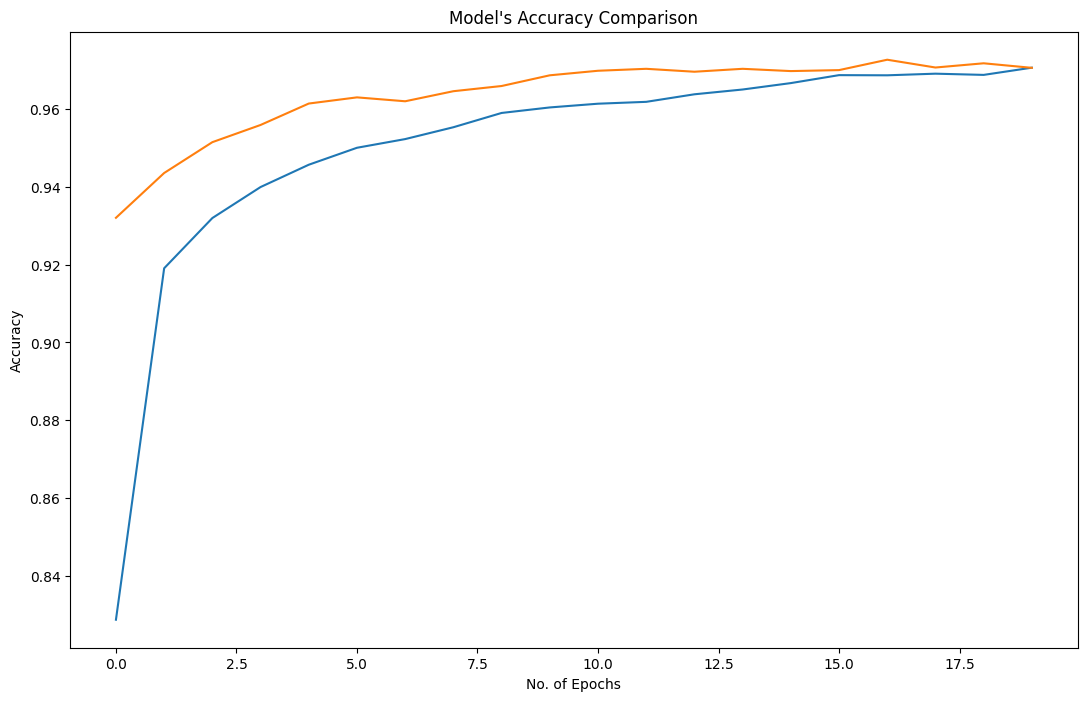

In [16]:
plt.figure(figsize=(13, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model's Accuracy Comparison")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.show()

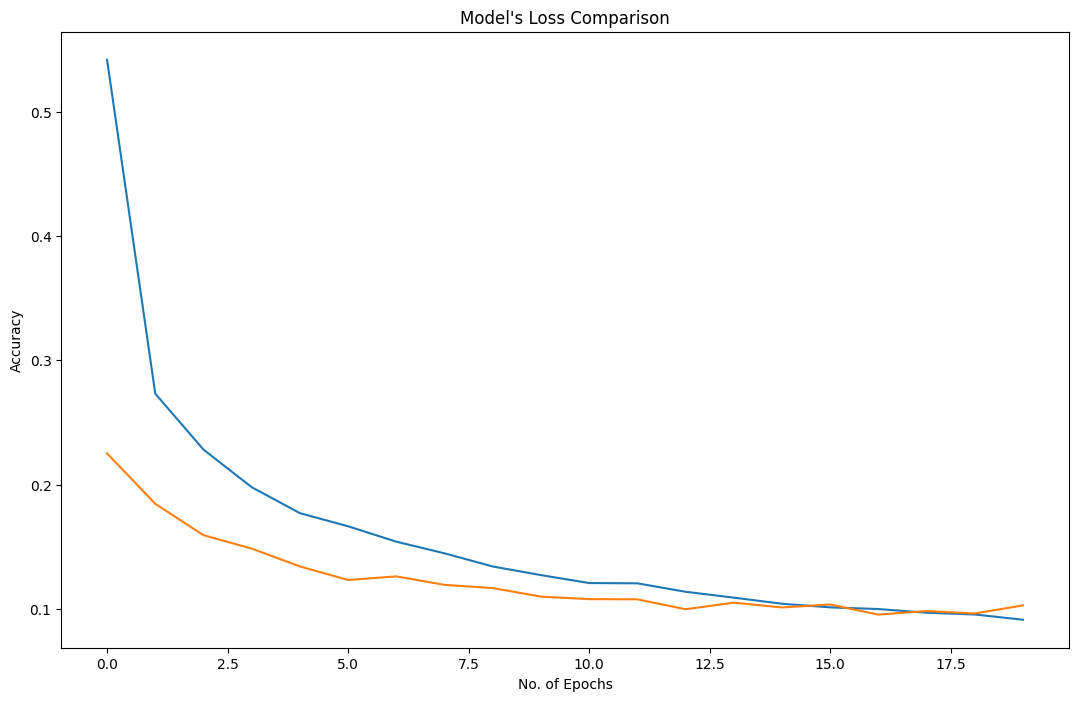

In [17]:
plt.figure(figsize=(13, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model's Loss Comparison")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.show()

# LeNet-5 Architecture

In [18]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [19]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [20]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [21]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255


In [22]:
# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Building the LeNet Model Architecture

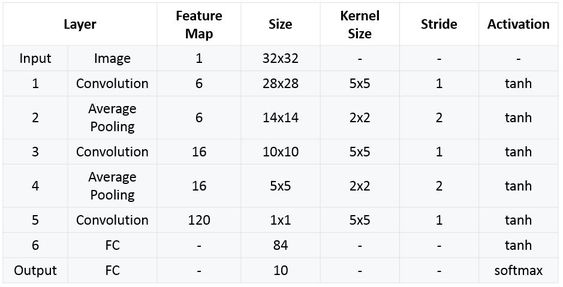

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [26]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 28s 58ms/step - loss: 0.3068 - accuracy: 0.9079 - val_loss: 0.0996 - val_accuracy: 0.9663
Epoch 2/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0886 - accuracy: 0.9734 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 3/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0562 - val_accuracy: 0.9807
Epoch 4/20
469/469 [==============================] - 28s 61ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0507 - val_accuracy: 0.9833
Epoch 5/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 6/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0362 - val_accuracy: 0.9894
Epoch 7/20
469/469 [==============================] - 27s 57ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0442 - val_accuracy:

In [29]:
# Evaluation

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0375 - accuracy: 0.9919
Test Loss: 0.03751394897699356
Test accuracy: 0.9919000267982483


## **Evaluation Graph**

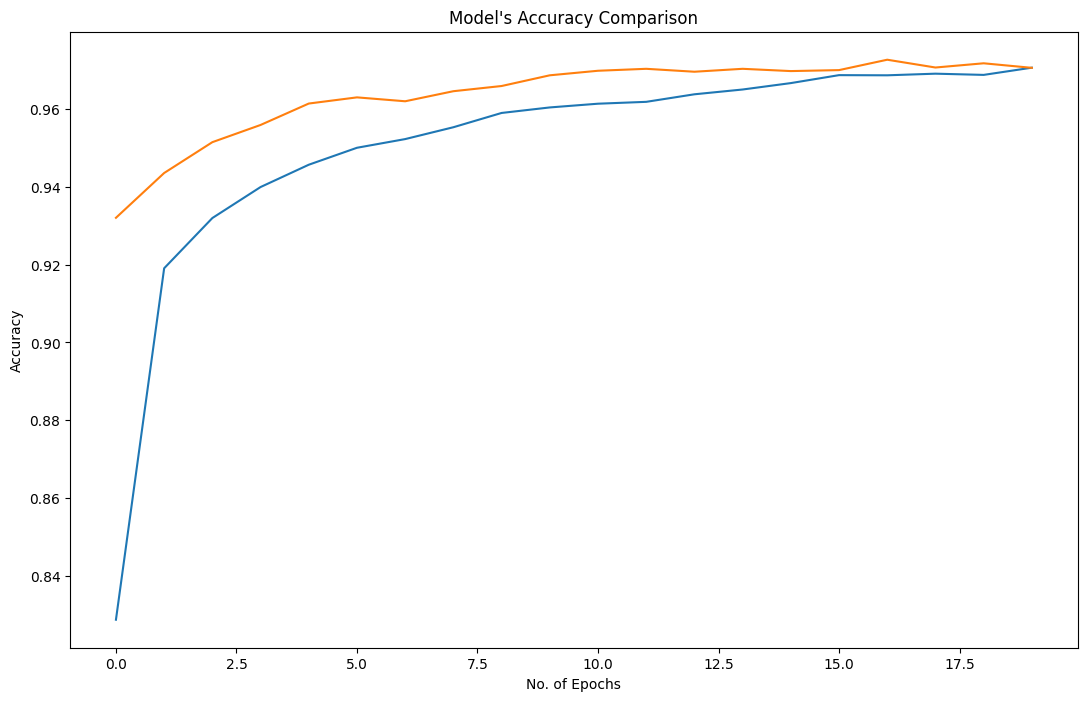

In [30]:
plt.figure(figsize=(13, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model's Accuracy Comparison")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.show()

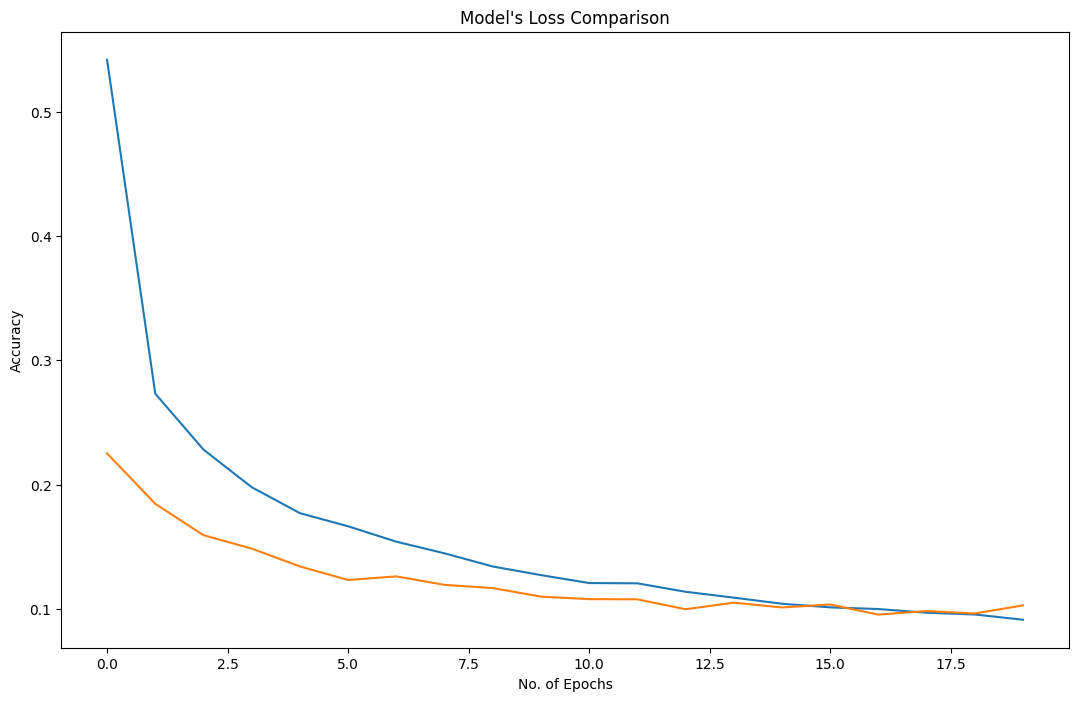

In [31]:
plt.figure(figsize=(13, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model's Loss Comparison")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.show()